<a href="https://colab.research.google.com/github/relmarrakchy/Cyber-Threat-Detection/blob/master/Cyber_threat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries :

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Discovering the dataset :

In [10]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/datasets/cyberthreat.csv")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                750 non-null    object
 1   Flag                    750 non-null    object
 2   Packet                  750 non-null    object
 3   Sender ID               750 non-null    int64 
 4   Receiver ID             750 non-null    int64 
 5   Source IP Address       750 non-null    object
 6   Destination IP Address  750 non-null    object
 7   Source Port             750 non-null    int64 
 8   Destination Port        750 non-null    int64 
 9   Packet Size             750 non-null    int64 
 10  Target Variable         750 non-null    object
dtypes: int64(5), object(6)
memory usage: 64.6+ KB


As we see here, we have no NaN values in our dataset. But we still need to convert some columns into the category data type.

In [12]:
dataset["Protocol"] = dataset["Protocol"].astype("category")
dataset["Flag"] = dataset["Flag"].astype("category")
dataset["Packet"] = dataset["Packet"].astype("category")
dataset["Target Variable"] = dataset["Target Variable"].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Protocol                750 non-null    category
 1   Flag                    750 non-null    category
 2   Packet                  750 non-null    category
 3   Sender ID               750 non-null    int64   
 4   Receiver ID             750 non-null    int64   
 5   Source IP Address       750 non-null    object  
 6   Destination IP Address  750 non-null    object  
 7   Source Port             750 non-null    int64   
 8   Destination Port        750 non-null    int64   
 9   Packet Size             750 non-null    int64   
 10  Target Variable         750 non-null    category
dtypes: category(4), int64(5), object(2)
memory usage: 45.1+ KB


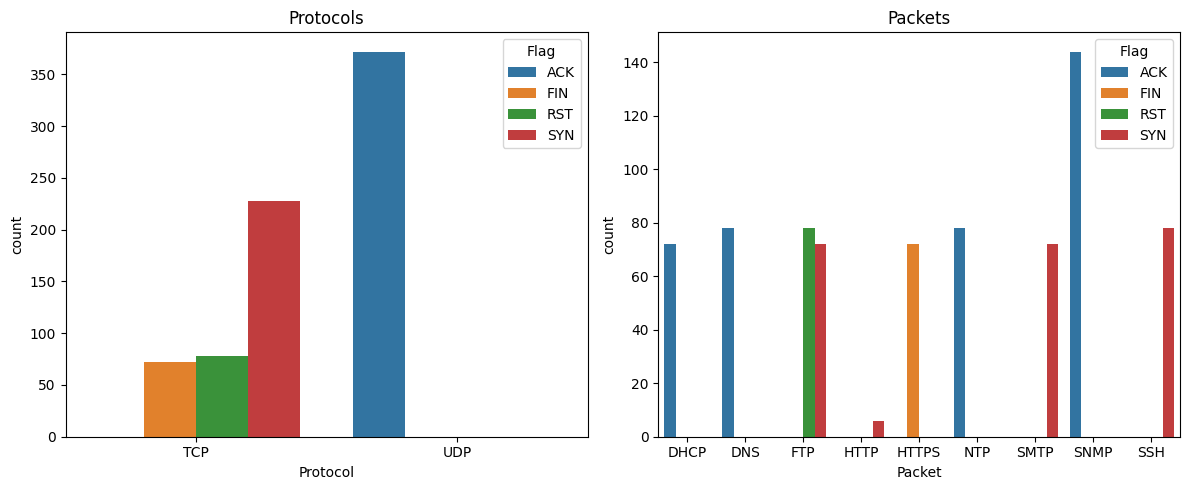

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Protocol", hue="Flag")
plt.title('Protocols')

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Packet", hue="Flag")
plt.title('Packets')

plt.tight_layout()

plt.show()

*   The packets are using UDP protocol : **DHCP, DNS, SNMP, NTP**
*   The packets are using TCP protocol : **FTP, HTTPS, HTTP, SMTP, SSH**

*  **FIN** flag means the connection termination and only send by **HTTPS** packets.
*  **RST** flag means the immediate connection termination caused by unrecoverable errors, and only send by **FTP** packets.
*  **SYN** flag means the connection initialization, and send by **FTP**, **HTTP**, **SMTP** and SSH packets

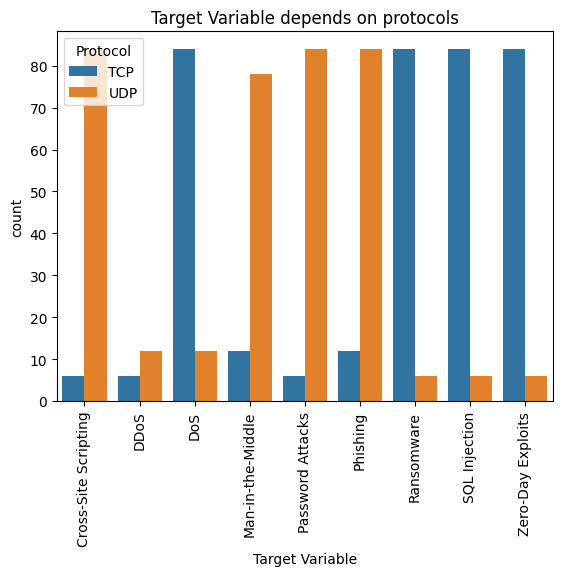

In [14]:
sns.countplot(data=dataset, x="Target Variable", hue="Protocol")
plt.title('Target Variable depends on protocols')
plt.xticks(rotation=90)

plt.show()

In [32]:
def make_pie_data(dataset, feature_1, feature_2):
    grouped_target = dataset.groupby(feature_1)
    grouped_packet = dataset.groupby(feature_2)
    targets = list(grouped_target.groups.keys())
    packets = list(grouped_packet.groups.keys())

    res = {}

    for t in targets:
        total_size = len(dataset[dataset[feature_1] == t])
        res[t] = {}

        for p in packets:
            partial_size = len(dataset[(dataset[feature_1] == t) & (dataset[feature_2] == p)])

            if partial_size != 0:
                res[t][p] = (total_size / 100) * partial_size

    return res

def draw_pie_plot(data):
  plt.figure(figsize=(18, 10))

  i = 1
  for target in data:
    packets = []
    rates = []
    for packet in data[target]:
      packets.append(packet)
      rates.append(data[target][packet])
    colors = sns.color_palette('pastel')[0:len(packets)]
    plt.subplot(3, 3, i)
    plt.pie(rates, labels = packets, colors = colors, autopct='%.0f%%')
    plt.title(f"{target}")
    i += 1
  plt.tight_layout()
  plt.show()

def draw_pie_plot_ports(data):
  plt.figure(figsize=(18, 15))

  i = 1
  for target in data:
    packets = []
    rates = []
    for packet in data[target]:
      packets.append(packet)
      rates.append(data[target][packet])
    colors = sns.color_palette('pastel')[0:len(packets)]
    plt.subplot(5, 5, i)
    plt.pie(rates, labels = packets, colors = colors, autopct='%.0f%%')
    plt.title(f"{target}")
    i += 1
  plt.tight_layout()
  plt.show()

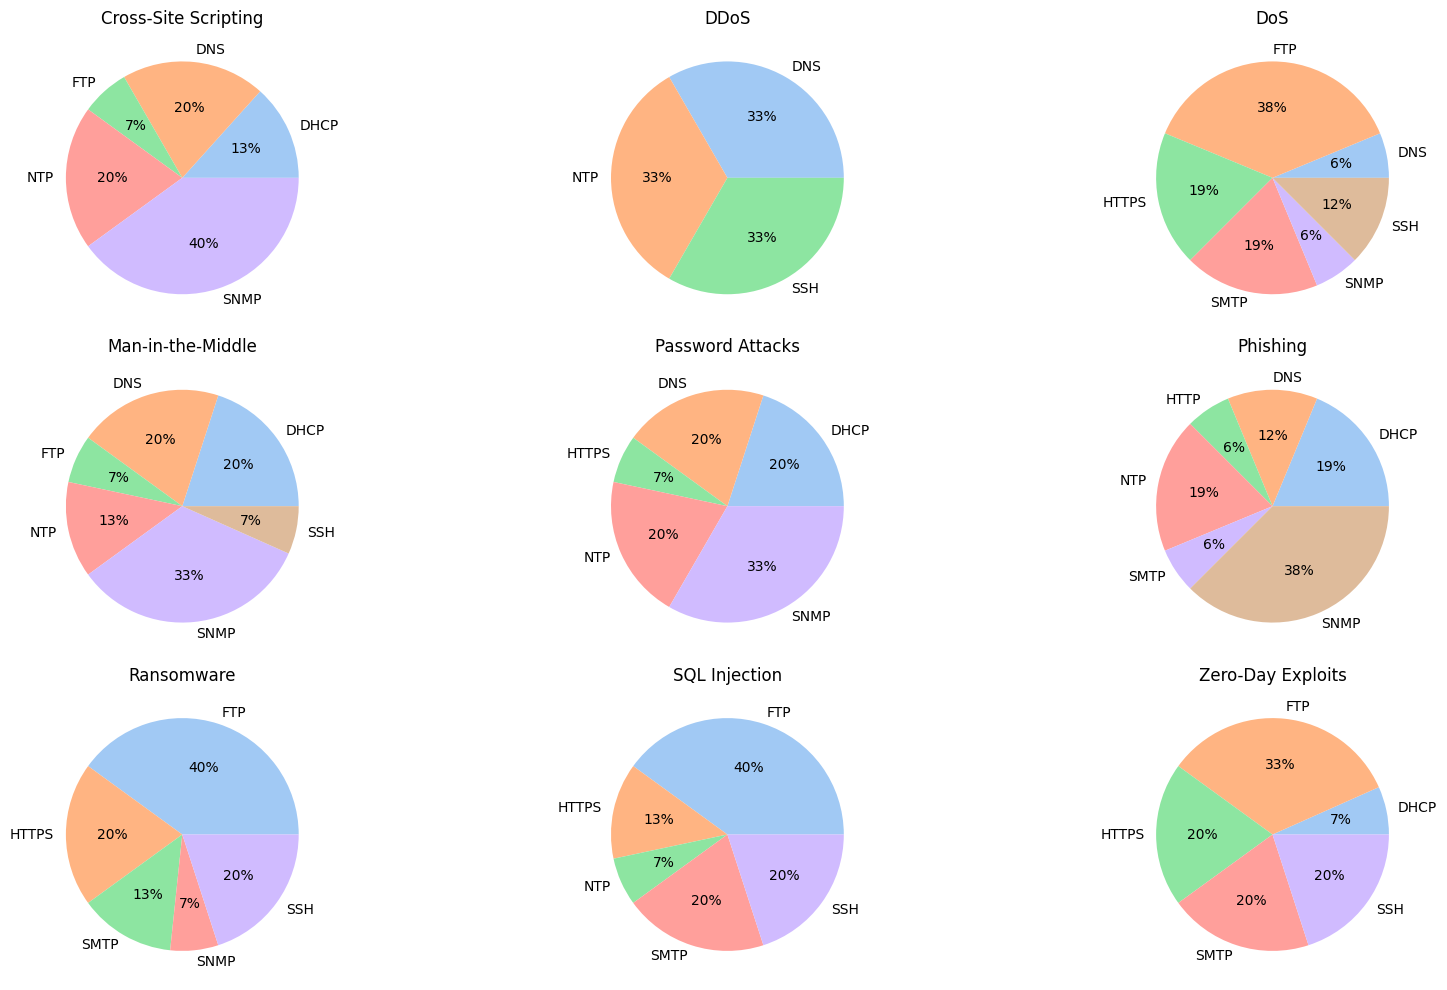

In [25]:
data = make_pie_data(dataset, "Target Variable", "Packet")
draw_pie_plot(data)

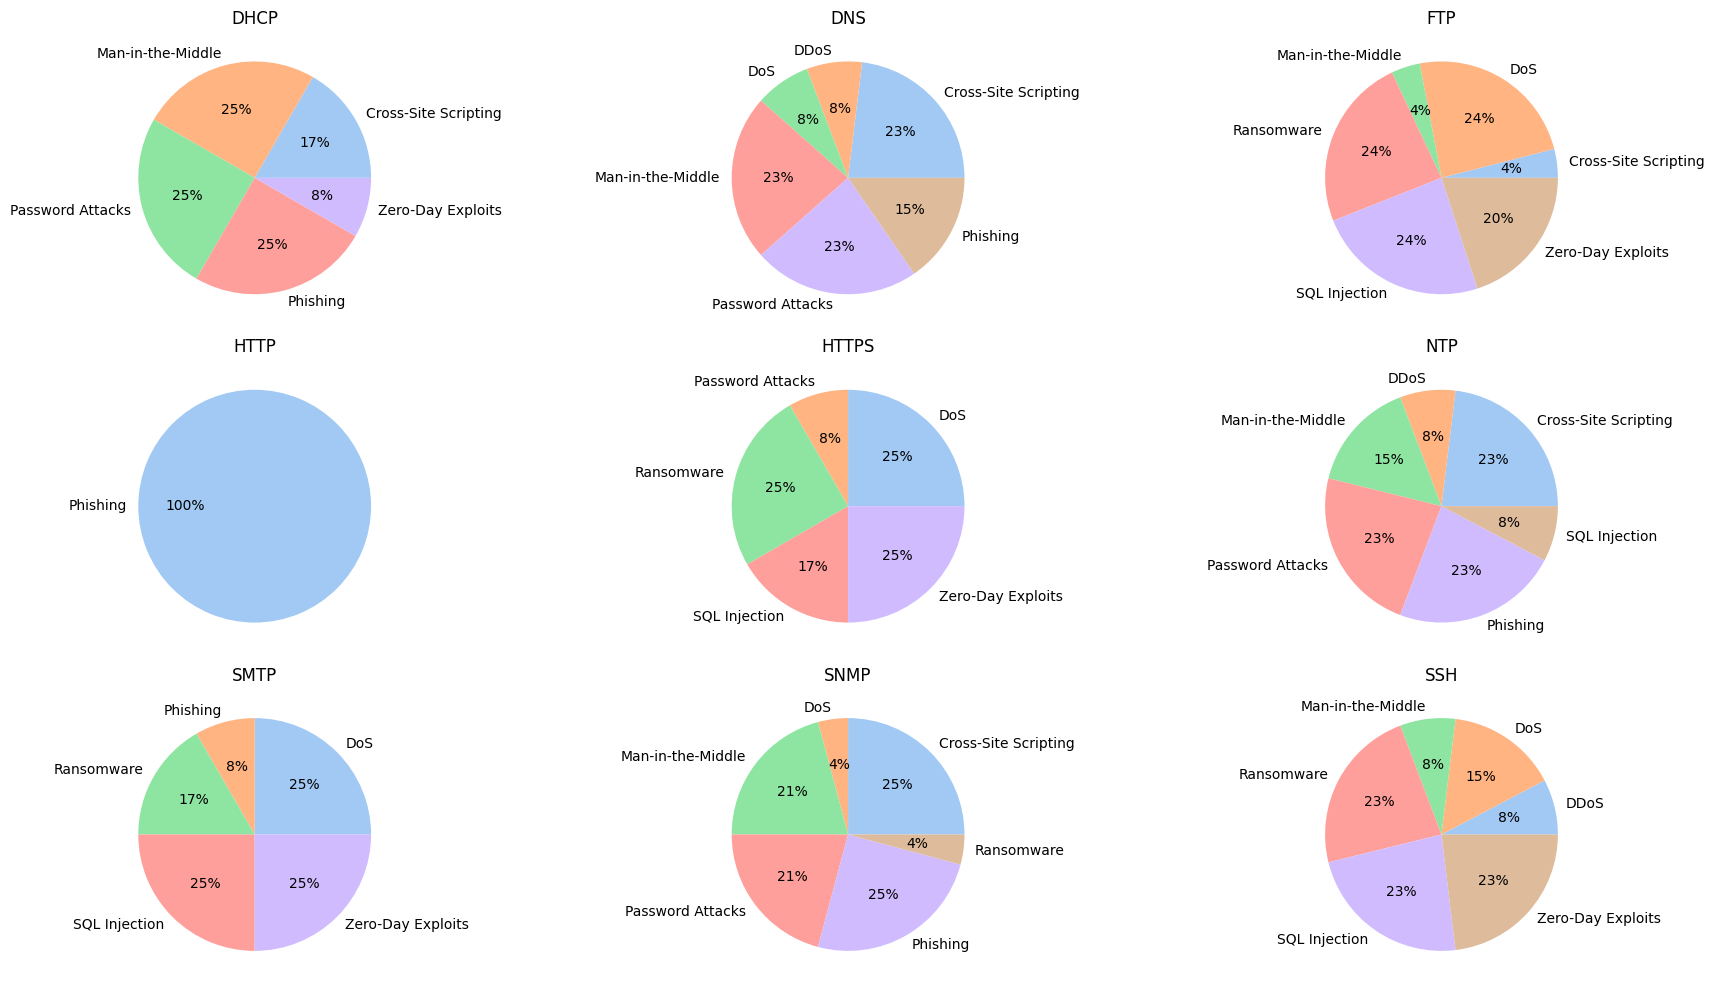

In [26]:
data = make_pie_data(dataset, "Packet", "Target Variable")
draw_pie_plot(data)

*   **Cross-Site Scripting** mainly comes from **UDP** protocol **(Mostly SNMP)**
*   **DoS** mainly comes from **TCP** protocol **(Mostly FTP)**
*   **Man-in-the-Middle** mainly comes from **UDP** protocol **(Mostly SNMP)**
*   **Password Attacks** mainly comes from **UDP** protocol **(Mostly SNMP)**
*   **Phishing** mainly comes from **UDP** protocol **(Mostly SNMP)**
*   **Ransomware** mainly comes from **TCP** protocol **(Mostly FTP)**
*   **SQL Injection** mainly comes from **TCP** protocol **(Mostly FTP)**
*   **Zero-Day** Exploits mainly comes from **TCP** protocol **(Mostly FTP)**

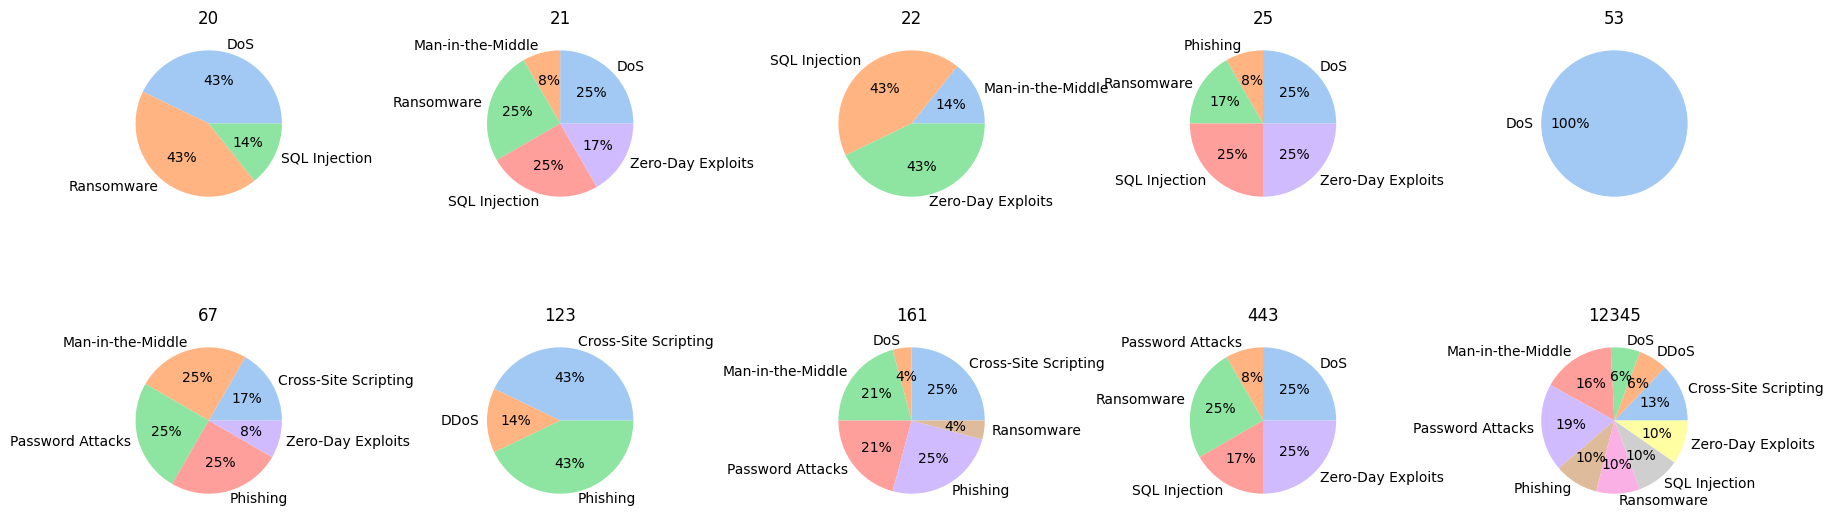

In [33]:
data = make_pie_data(dataset, "Source Port", "Target Variable")
draw_pie_plot_ports(data)

*   **DDoS only comes from the port 12345**
*   **XSS** mainly comes from the port **123** (also 67, 161 and 12345)
*   **DoS** mainly comes from the port **53** (also 20, 21, 25, 161, 443 and 12345)
*   **MitM** mainly comes from the port **67** (also 21, 22, 67, 161 and 12345)
*   **Password Attacks** mainly comes from the port **67** (also 161, 443 and 12345)
*   **Phishing** mainly comes from the port **123** (also 25, 67, 161 and 12345)
*   **Ransomware** mainly comes from the port **20** (also 21, 25, 161, 443 and 12345)
*   **SQL Injection** mainly comes from the port **22** (also 20, 21, 25, 443 and 12345)
*   **Zero-Day-Exploits** Injection mainly comes from the port **22** (also 21, 25, 67, 443 and 12345)

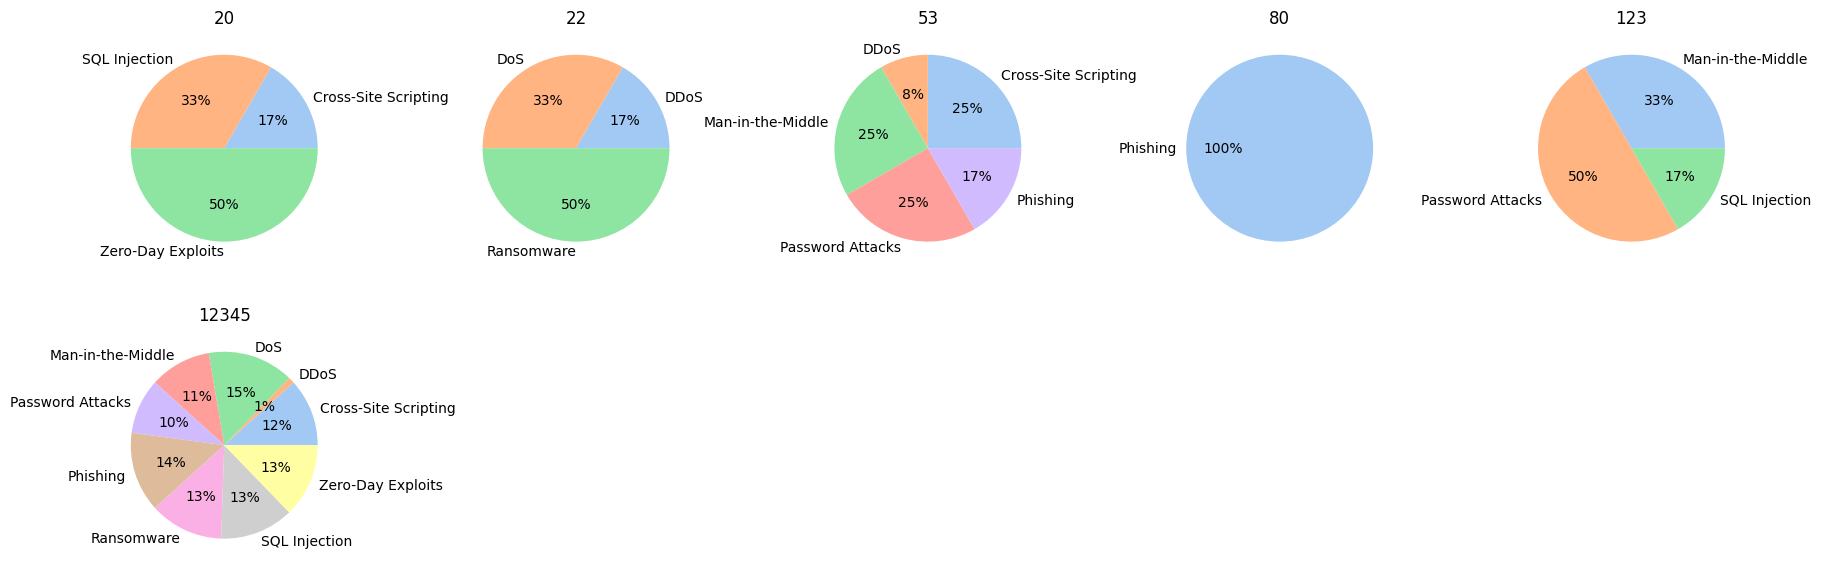

In [34]:
data = make_pie_data(dataset, "Destination Port", "Target Variable")
draw_pie_plot_ports(data)

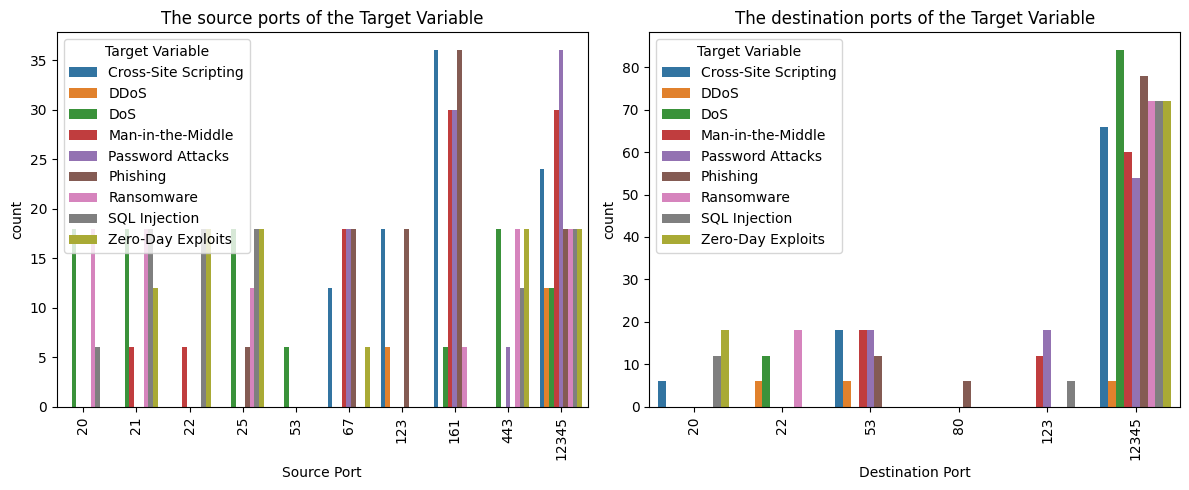

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Source Port", hue="Target Variable")
plt.title('The source ports of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Destination Port", hue="Target Variable")
plt.title('The destination ports of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

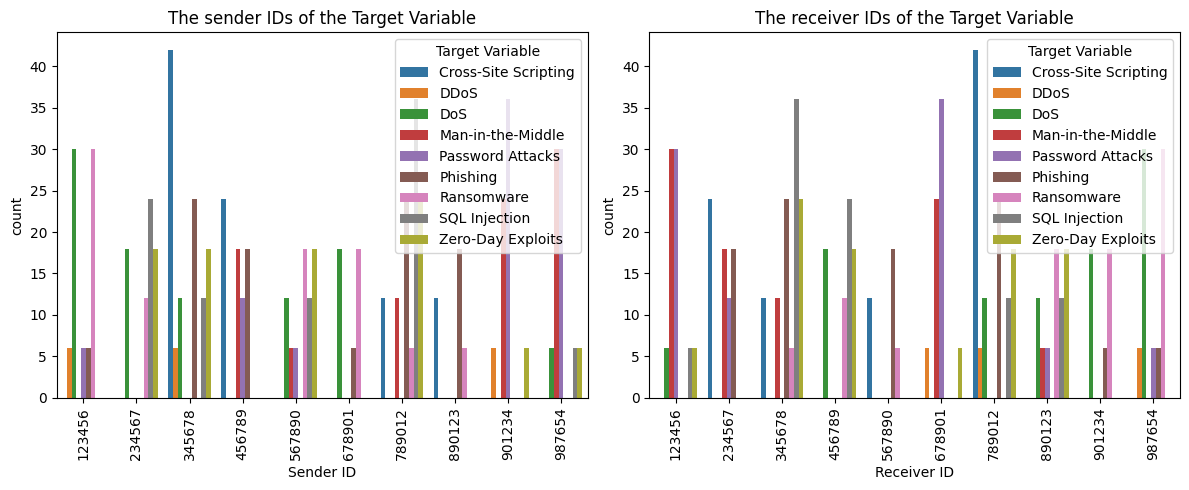

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Sender ID", hue="Target Variable")
plt.title('The sender IDs of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Receiver ID", hue="Target Variable")
plt.title('The receiver IDs of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

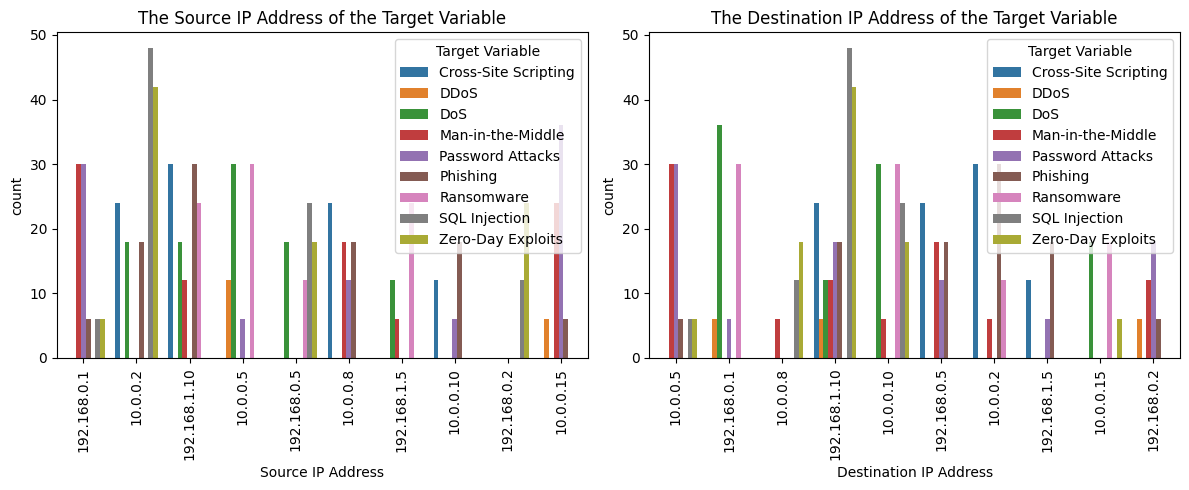

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Source IP Address", hue="Target Variable")
plt.title('The Source IP Address of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Destination IP Address", hue="Target Variable")
plt.title('The Destination IP Address of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

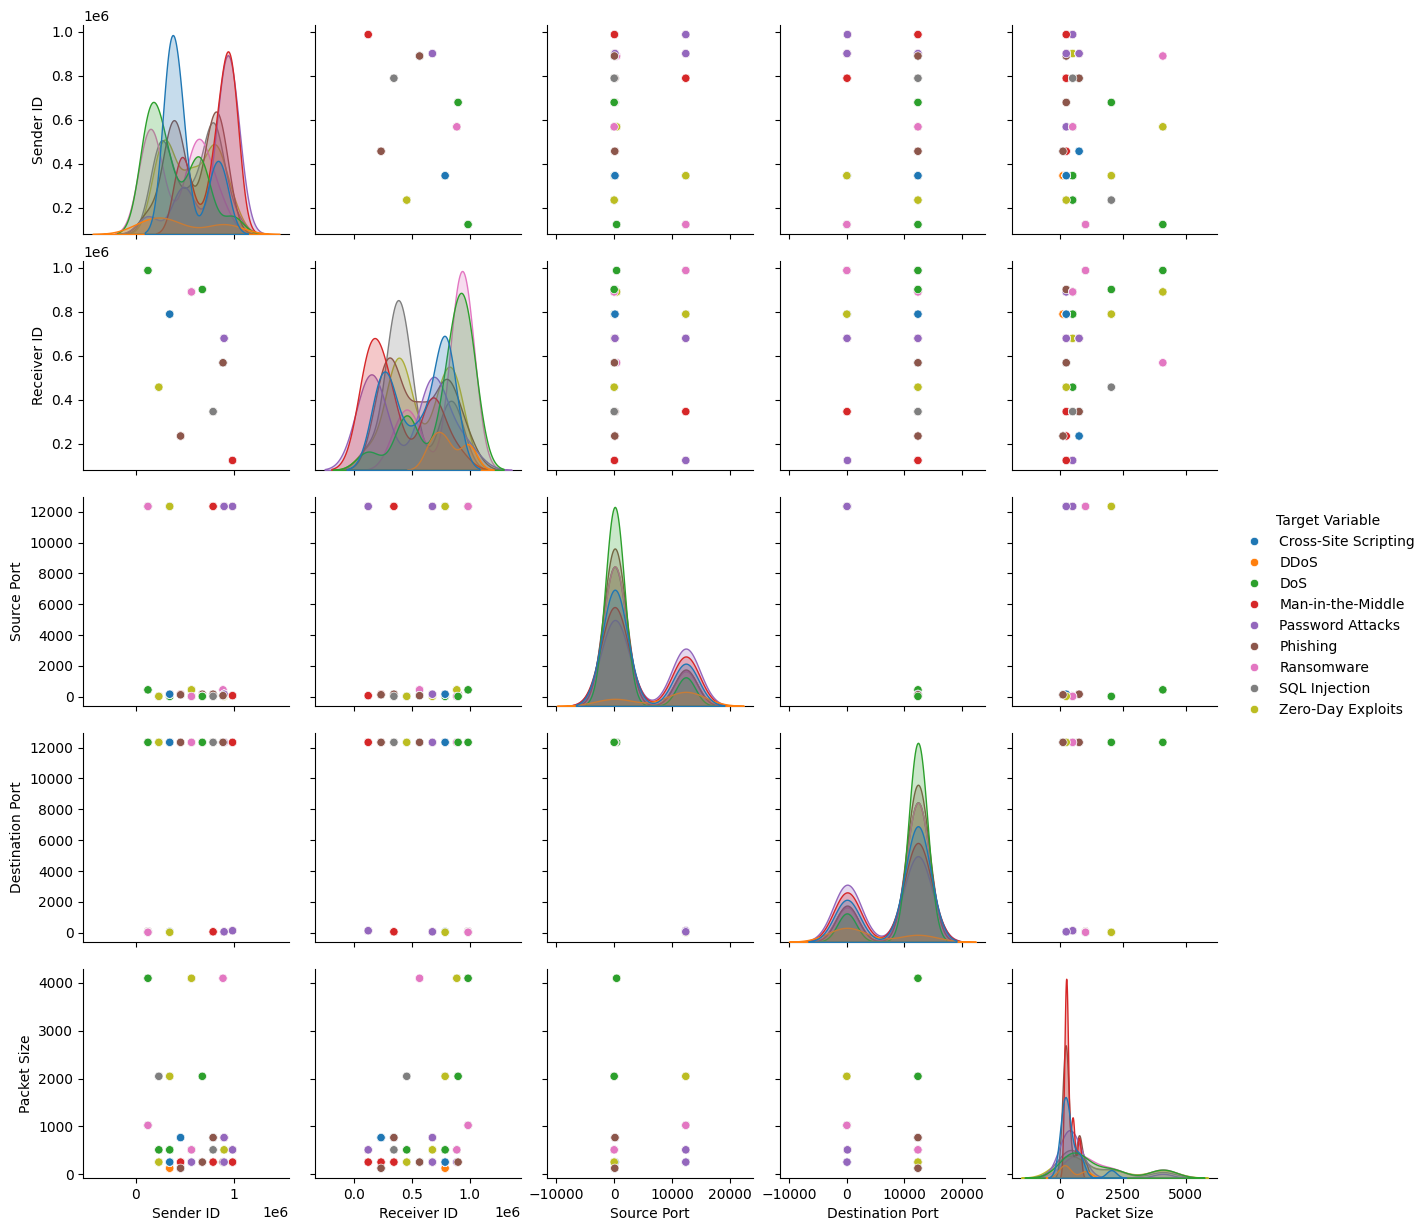

In [20]:
sns.pairplot(data=dataset, hue="Target Variable")
plt.show()